# Análise de segmentação de clientes de uma empresa de cartão de crédito

<p style="text-align: justify">A segmentação de cliente para uma empresa pode ser de extrema importância, visto que ações de marketing direcionadas para cada perfil de cliente pode aumentar o faturamento da empresa. Entretanto, o número de atributos dos clientes coletados pelas empresas vem aumentando e realizar essa segmentação tem se tornado um desafio. Dessa maneira, algoritmos de clustering podem ajudar nesta tarefa e como consequência aumentar os lucros da empresa. Abaixo segue uma análise de segmentação de clientes de uma empresa de cartão de crédito.</p>  

O conjunto de dados utilizado nesta análise pode ser encontrado no site <a href = 'https://www.kaggle.com/arjunbhasin2013/ccdata'>Kaggle</a>, e abaixo seguem as informações dos atributos do conjunto de dados: 

**CUSTID** : Identificação do cliente.<br>
**BALANCE** : Quantidade de dinheiro em conta corrente para fazer as compras.<br> 
**BALANCEFREQUENCY** : Frequência de atualização do saldo, score entre 0 e 1 (1 = Frequente, 0 = não frequente).<br>
**PURCHASES** : Quantidade de compras realizadas pela conta.<br>
**ONEOFFPURCHASES** : Quantidade máxima de compras feitas de uma vez só.<br>
**INSTALLMENTSPURCHASES** : Quantidade de compras parceladas. <br>
**CASHADVANCE** : Dinheiro adiantado dado pelo usuário da conta.<br>
**PURCHASESFREQUENCY** : Frequência de compras realizadas, score entre 0 e 1 (1 = Frequente, 0 = não frequente).<br>
**ONEOFFPURCHASESFREQUENCY** : Frequência de compras feitas de uma vez só (pagamento do  valor total) (1 = Frequente, 0 = não frequente).<br>
**PURCHASESINSTALLMENTSFREQUENCY** : Frequência de compras parceladas (1 = Frequente, 0 = não frequente).<br>
**CASHADVANCEFREQUENCY** : Frequência que o dinheiro sacado está sendo pago (1 = Frequente, 0 = não frequente).<br>
**CASHADVANCETRX** : Número de transações feitas em "Cash in Advanced".<br>
**PURCHASESTRX** : Número de transações de compras feitas.<br>
**CREDITLIMIT** : Limite de crédito do cliente.<br>
**PAYMENTS** : Quantidade de pagamentos feitos pelo cliente.<br>
**MINIMUM_PAYMENTS** : Pagamentos mínimos feitos pelo cliente.<br>
**PRCFULLPAYMENT** : Pagamentos totais feitos pelo cliente.<br>
**TENURE** : Posse do serviço do cartão de crédito pelo cliente.<br>

### Importando bibliotecas

In [1]:
#Bibliotecas para o tratamento e visualização dos dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Biblioteca para o pré-processamento dos atributos
from sklearn.preprocessing import StandardScaler

#Bibliotecas para a análise de clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
#Carregando conjunto de dados
df = pd.read_csv('CC GENERAL.csv')
#Visualizando conjunto de dados
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


##### Verificando tamanho do conjunto de dados

In [3]:
#Verificando número de linhas e colunas do conjunto de dados
print('Número de linhas: {}'.format(df.shape[0]),'\n')
print('Número de colunas: {}'.format(df.shape[1]))

Número de linhas: 8950 

Número de colunas: 18


##### Verificando informações dos atributos

In [4]:
#Verificando informações dos atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Exitem informações nulas nos atributos *CREDIT LIMIT* e *MINIMUM_PAYMENTS*.

##### Verificando a existência de dados nulos

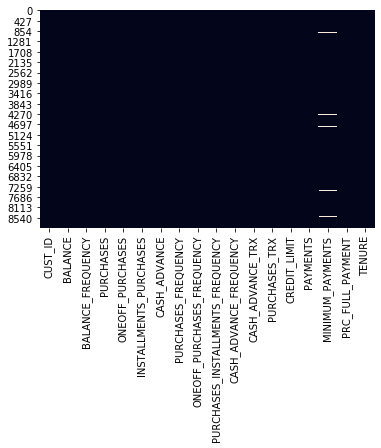

In [5]:
#Exibindo mapa de calor dos dados nulos
sns.heatmap(df.isnull(), cbar=False);

##### Verificando quais as linhas nulas

In [6]:
#Identficando linhas com dados nulos da coluna 'CREDIT_LIMIT'
df[df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [7]:
#Identficando linhas com dados nulos da coluna 'MINIMUM_PAYMENTS'
df[df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


##### Substituindo valores nulos pela média do atributo

In [8]:
#Substituindo valores nulos pela média de valores de cada coluna
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [9]:
#Verificando a existência de valores nulos
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

##### Verificando a existência de valores duplicados

In [10]:
#Exibindo número de valores duplicados
print('Número de linhas duplicadas:', df.duplicated().sum())

Número de linhas duplicadas: 0


##### Verificando estatísticas descritivas

In [11]:
#Exibindo estatísticas descritivas
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##### Verificando correlações entre os atributos

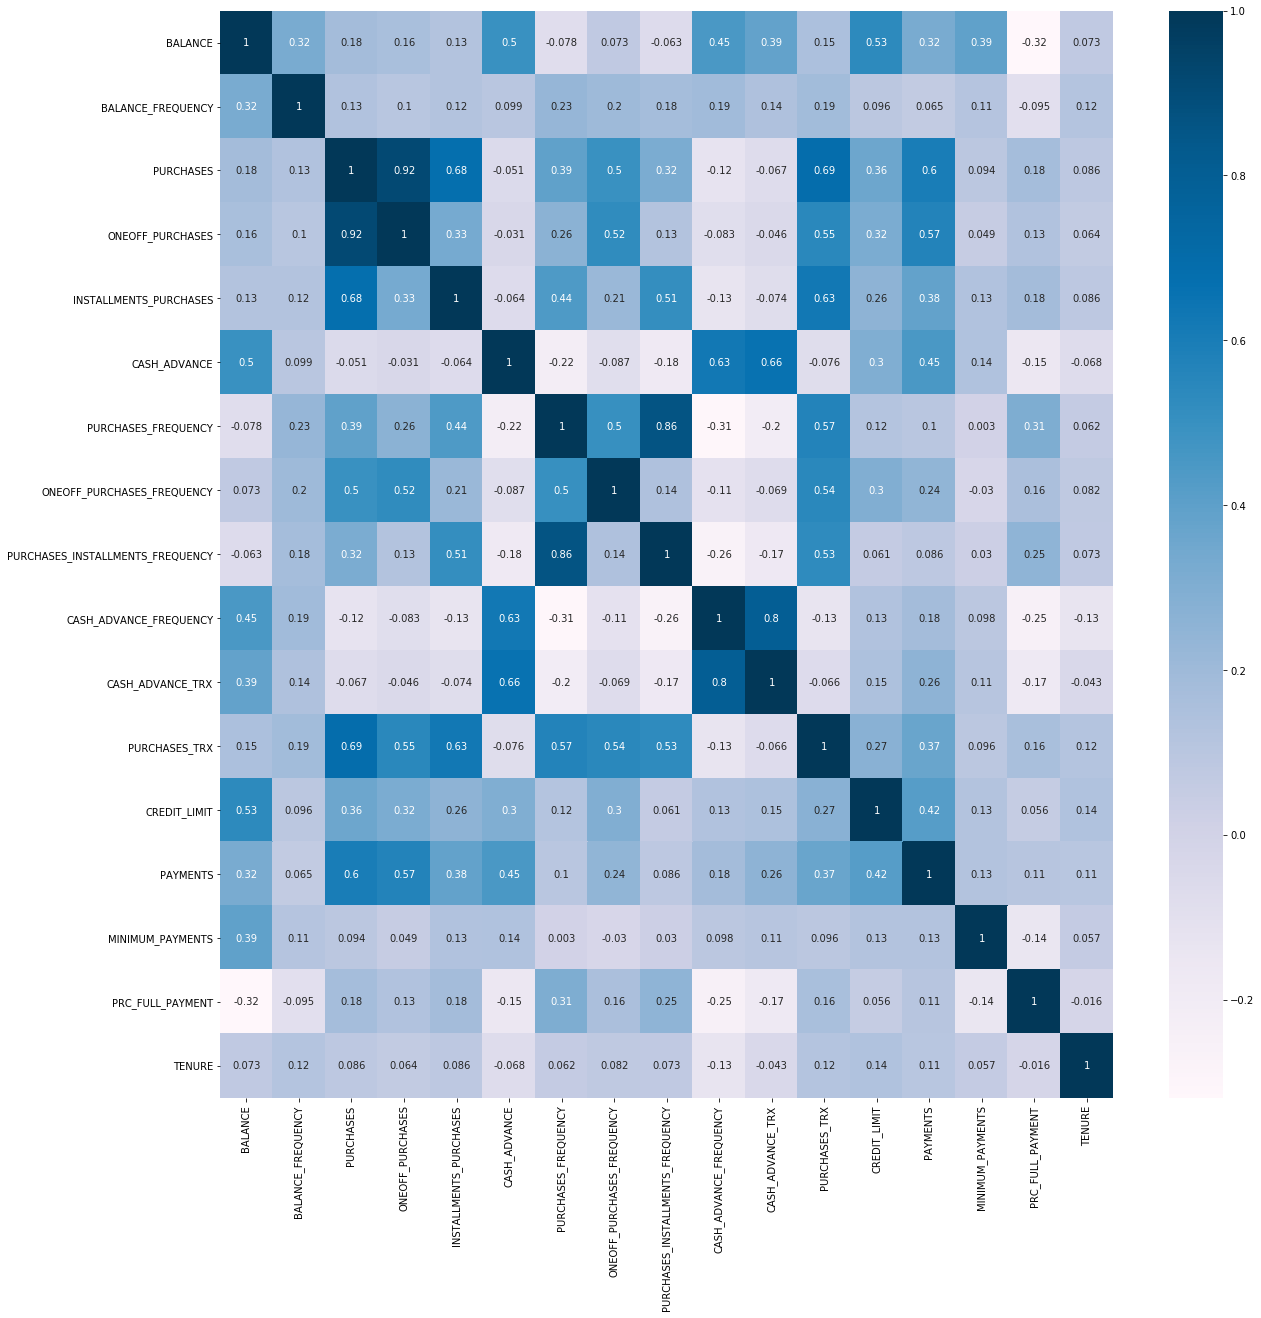

In [12]:
#Criando mapa de calor com as correlações dos atributos
corr = df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr, annot=True, cmap='PuBu');

### Pré-processamento de variáveis

#####  Retirando atributos que não serão usados na segmentação

In [13]:
#Excluindo coluna 'CUST_ID'
df.drop('CUST_ID', axis=1, inplace=True)

##### Padronização dos valores dos atributos

In [14]:
#Padronizando os atributos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [15]:
#Verificando valores padronizados
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

### Definindo número de grupos que os clientes serão categorizados

##### Elbow método

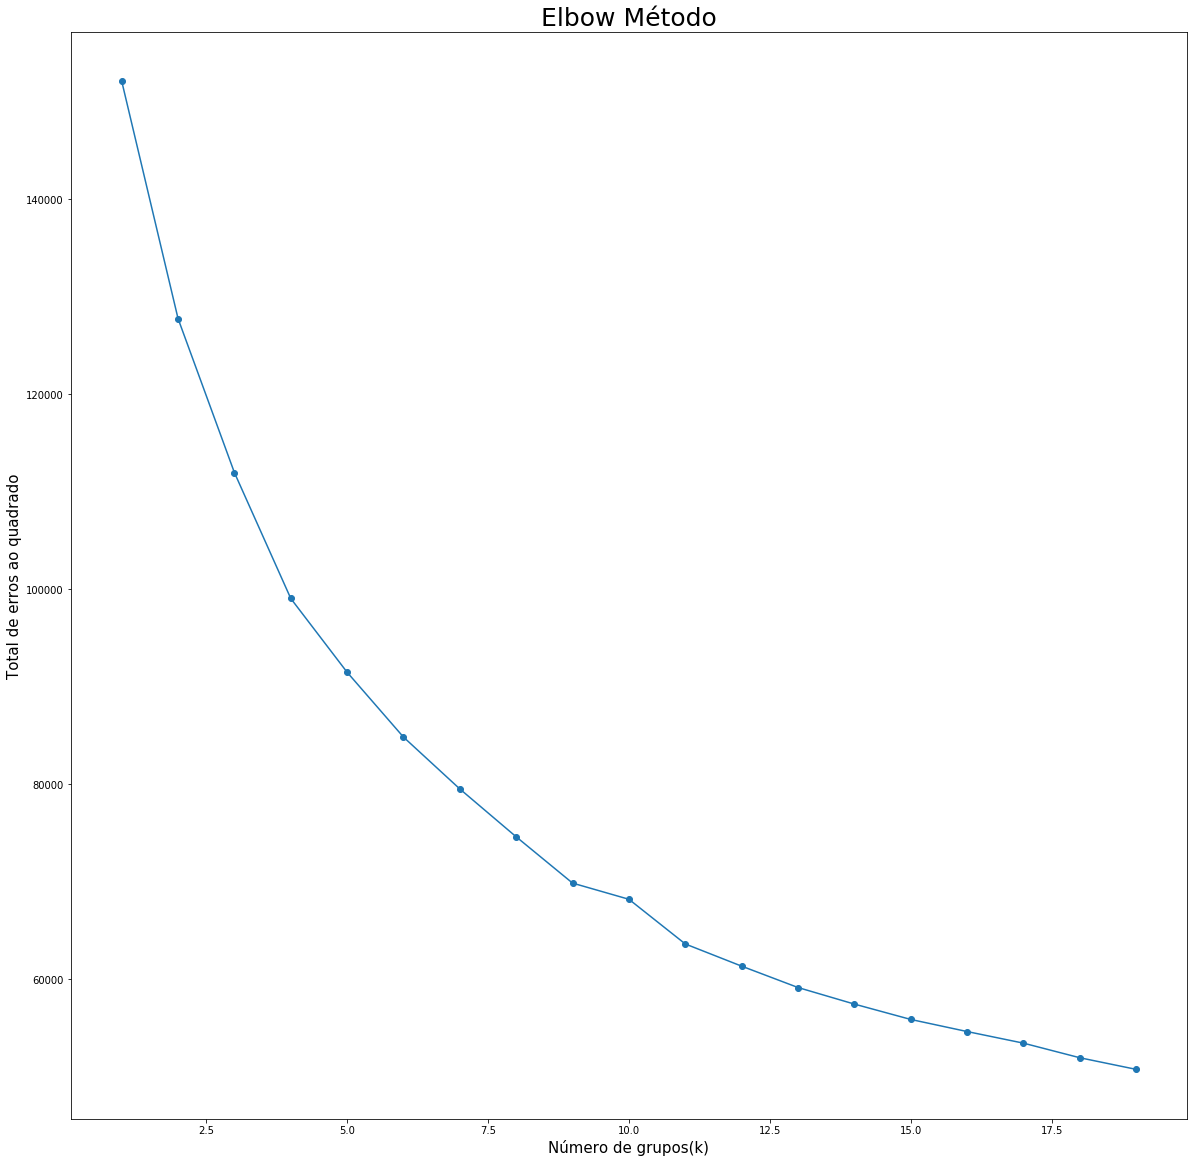

In [79]:
#Criando gráfico para verificar o melhor número de grupos
distancias = []

K= range(1,20)

for i in K:
    km = KMeans(n_clusters=i, random_state=0)
    y_km= km.fit(df_scaled)
    distancias.append(y_km.inertia_)
    
plt.figure(figsize=(20,20))    
plt.plot(K, distancias, marker='o')
plt.xlabel('Número de grupos(k)', fontsize=15)
plt.ylabel('Total de erros ao quadrado',fontsize=15)
plt.title ('Elbow Método',fontsize=25)
plt.show()

In [17]:
#Verificando o melhor valor de silhouette para determinar número de grupos
silhouette = []
K= range(2,22)

for i in K:
    km = KMeans(n_clusters=i, random_state=0)
    y_km = km.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled,y_km)
    silhouette.append(silhouette_avg)
    
silhouette = pd.DataFrame(silhouette,index = K, columns=['Valor_Silhouette'])
silhouette.index.name = 'Número de grupos'
silhouette

,Valor_Silhouette
Número de grupos,
2,0.209982
3,0.250095
4,0.197607
5,0.193244
6,0.202796
7,0.215047
8,0.221947
9,0.226897
10,0.211698


<p style="text-align: justify">Analisando os valores de Silhoette e Elbow método, é possível constatar que a segmentação em nove grupos distintos é uma boa alternativa para os clientes da empresa.</p>

### Criando o modelo

In [53]:
#Criando o modelo
km = KMeans(n_clusters=9, random_state=0)
kmeans = km.fit(df_scaled)
#verificando os rótulos de cada grupo
labels = kmeans.labels_
labels

array([1, 4, 0, ..., 6, 6, 6])

In [54]:
#Verificando o comprimento dos rótulos
len(labels)

8950

##### Rotulando os clientes

In [55]:
#Criando um atributo dos rótulos para o conjunto de dados
df['CLUSTERS'] = labels
#Visualizando o conjunto de dados
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


In [56]:
df['CLUSTERS'].unique()

array([1, 4, 0, 5, 2, 3, 6, 8, 7])

##### Separando o conjunto de dados de cada grupo

In [59]:
df_cluster_0 = df[df['CLUSTERS'] == 0]
df_cluster_1 = df[df['CLUSTERS'] == 1]
df_cluster_2 = df[df['CLUSTERS'] == 2]
df_cluster_3 = df[df['CLUSTERS'] == 3]
df_cluster_4 = df[df['CLUSTERS'] == 4]
df_cluster_5 = df[df['CLUSTERS'] == 5]
df_cluster_6 = df[df['CLUSTERS'] == 6]
df_cluster_7 = df[df['CLUSTERS'] == 7]
df_cluster_8 = df[df['CLUSTERS'] == 8]

### Análise do agrupamento

<p style="text-align: justify">Agora que foi realizada a segmentação dos clientes, é importante avaliar estatísticas descritivas de cada grupo e destacar informações importantes para a empresa.</p>

#### Grupo 0 

In [60]:
gr_0 =pd.DataFrame(df_cluster_0.describe().loc[['mean','std','min','max']]).T
gr_0.index.name = 'Atributos_grupo_0'
gr_0.drop(gr_0.index[-1], axis=0, inplace = True)
gr_0

,mean,std,min,max
Atributos_grupo_0,,,,
BALANCE,1306.695574,1540.897813,1.198223,10598.467770
BALANCE_FREQUENCY,0.971996,0.079369,0.181818,1.000000
PURCHASES,2135.610443,1384.311274,8.400000,8945.670000
ONEOFF_PURCHASES,1687.224832,1268.890363,8.400000,8945.670000
INSTALLMENTS_PURCHASES,448.385612,520.626484,0.000000,2958.240000
CASH_ADVANCE,293.149804,793.270752,0.000000,7894.578816
PURCHASES_FREQUENCY,0.882878,0.154328,0.250000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.767427,0.212766,0.083333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.432350,0.374988,0.000000,1.000000


#### Grupo 1

In [62]:
gr_1 =pd.DataFrame(df_cluster_1.describe().loc[['mean','std','min','max']]).T
gr_1.index.name = 'Atributos_grupo_1'
gr_1.drop(gr_1.index[-1], axis=0, inplace = True)
gr_1

,mean,std,min,max
Atributos_grupo_1,,,,
BALANCE,1579.542294,1315.946019,0.488050,9335.314170
BALANCE_FREQUENCY,0.972737,0.074271,0.454545,1.000000
PURCHASES,242.073201,431.976517,0.000000,4900.000000
ONEOFF_PURCHASES,191.701504,399.036214,0.000000,4900.000000
INSTALLMENTS_PURCHASES,50.552310,144.098698,0.000000,3000.000000
CASH_ADVANCE,775.448155,1035.276682,0.000000,6479.639793
PURCHASES_FREQUENCY,0.150098,0.183875,0.000000,0.750000
ONEOFF_PURCHASES_FREQUENCY,0.085113,0.130506,0.000000,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,0.066240,0.134602,0.000000,0.666667


#### Grupo 2

In [63]:
gr_2 =pd.DataFrame(df_cluster_2.describe().loc[['mean','std','min','max']]).T
gr_2.index.name = 'Atributos_grupo_2'
gr_2.drop(gr_2.index[-1], axis=0, inplace = True)
gr_2

,mean,std,min,max
Atributos_grupo_2,,,,
BALANCE,3672.864807,3282.447103,12.659909,18495.55855
BALANCE_FREQUENCY,0.988006,0.059206,0.272727,1.00000
PURCHASES,6302.130336,2898.454949,1567.250000,15704.04000
ONEOFF_PURCHASES,3640.948235,2883.644614,0.000000,14215.00000
INSTALLMENTS_PURCHASES,2662.862773,2156.749704,0.000000,14686.10000
CASH_ADVANCE,654.226215,1527.147590,0.000000,15133.53213
PURCHASES_FREQUENCY,0.958543,0.119708,0.250000,1.00000
ONEOFF_PURCHASES_FREQUENCY,0.677578,0.311448,0.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,0.869561,0.239987,0.000000,1.00000


#### Grupo 3

In [64]:
gr_3 =pd.DataFrame(df_cluster_3.describe().loc[['mean','std','min','max']]).T
gr_3.index.name = 'Atributos_grupo_3'
gr_3.drop(gr_3.index[-1], axis=0, inplace = True)
gr_3

,mean,std,min,max
Atributos_grupo_3,,,,
BALANCE,103.893570,224.675193,0.000000,2075.637866
BALANCE_FREQUENCY,0.369069,0.196326,0.000000,0.727273
PURCHASES,340.122129,476.190914,0.000000,3734.700000
ONEOFF_PURCHASES,202.455691,438.607070,0.000000,3734.700000
INSTALLMENTS_PURCHASES,137.918176,249.833042,0.000000,3011.360000
CASH_ADVANCE,304.030575,813.668322,0.000000,6523.780195
PURCHASES_FREQUENCY,0.267562,0.247498,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.070196,0.112244,0.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.189781,0.253637,0.000000,1.000000


#### Grupo 4

In [65]:
gr_4 =pd.DataFrame(df_cluster_4.describe().loc[['mean','std','min','max']]).T
gr_4.index.name = 'Atributos_grupo_4'
gr_4.drop(gr_4.index[-1], axis=0, inplace = True)
gr_4

,mean,std,min,max
Atributos_grupo_4,,,,
BALANCE,5027.339499,2861.365287,78.114579,16304.88925
BALANCE_FREQUENCY,0.969540,0.092808,0.181818,1.00000
PURCHASES,522.634936,894.919060,0.000000,7194.53000
ONEOFF_PURCHASES,326.589686,679.970190,0.000000,6678.26000
INSTALLMENTS_PURCHASES,196.163333,420.369123,0.000000,3885.45000
CASH_ADVANCE,5226.481892,3920.459120,0.000000,47137.21176
PURCHASES_FREQUENCY,0.296807,0.357230,0.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,0.138496,0.223724,0.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,0.197060,0.321455,0.000000,1.00000


#### Grupo 5

In [66]:
gr_5 =pd.DataFrame(df_cluster_5.describe().loc[['mean','std','min','max']]).T
gr_5.index.name = 'Atributos_grupo_5'
gr_5.drop(gr_5.index[-1], axis=0, inplace = True)
gr_5

,mean,std,min,max
Atributos_grupo_5,,,,
BALANCE,784.786276,1083.445280,0.892901,7994.331680
BALANCE_FREQUENCY,0.955564,0.105981,0.272727,1.000000
PURCHASES,931.312688,765.800367,12.000000,4709.140000
ONEOFF_PURCHASES,189.618159,369.708496,0.000000,3227.850000
INSTALLMENTS_PURCHASES,742.144997,624.058334,12.000000,4313.220000
CASH_ADVANCE,216.542855,636.687441,0.000000,5903.784384
PURCHASES_FREQUENCY,0.890828,0.144509,0.272727,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.087783,0.132949,0.000000,0.583333
PURCHASES_INSTALLMENTS_FREQUENCY,0.845539,0.177522,0.181818,1.000000


#### Grupo 6

In [67]:
gr_6 =pd.DataFrame(df_cluster_6.describe().loc[['mean','std','min','max']]).T
gr_6.index.name = 'Atributos_grupo_6'
gr_6.drop(gr_6.index[-1], axis=0, inplace = True)
gr_6

,mean,std,min,max
Atributos_grupo_6,,,,
BALANCE,864.645308,1089.433152,0.000000,7215.195760
BALANCE_FREQUENCY,0.794979,0.235701,0.000000,1.000000
PURCHASES,388.085586,604.912873,0.000000,4139.560000
ONEOFF_PURCHASES,236.917416,546.980330,0.000000,4139.560000
INSTALLMENTS_PURCHASES,151.649711,273.963723,0.000000,2068.150000
CASH_ADVANCE,1120.263874,1520.739234,0.000000,10590.411130
PURCHASES_FREQUENCY,0.409393,0.393812,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.117161,0.201584,0.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.275356,0.352057,0.000000,1.000000


#### Grupo 7

In [68]:
gr_7 =pd.DataFrame(df_cluster_7.describe().loc[['mean','std','min','max']]).T
gr_7.index.name = 'Atributos_grupo_7'
gr_7.drop(gr_7.index[-1], axis=0, inplace = True)
gr_7

,mean,std,min,max
Atributos_grupo_7,,,,
BALANCE,5351.546106,4235.586482,1268.809031,19043.138560
BALANCE_FREQUENCY,0.948727,0.155542,0.272727,1.000000
PURCHASES,27085.309200,8459.048271,12551.950000,49039.570000
ONEOFF_PURCHASES,21002.018800,9530.796328,0.000000,40761.250000
INSTALLMENTS_PURCHASES,6083.290400,5776.135354,0.000000,22500.000000
CASH_ADVANCE,1488.363253,4791.367812,0.000000,19513.474830
PURCHASES_FREQUENCY,0.892667,0.233833,0.166667,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.808667,0.290160,0.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.708667,0.370814,0.000000,1.000000


#### Grupo 8

In [69]:
gr_8 =pd.DataFrame(df_cluster_8.describe().loc[['mean','std','min','max']]).T
gr_8.index.name = 'Atributos_grupo_8'
gr_8.drop(gr_8.index[-1], axis=0, inplace = True)
gr_8

,mean,std,min,max
Atributos_grupo_8,,,,
BALANCE,3874.347938,2230.137672,1134.122053,10571.411070
BALANCE_FREQUENCY,0.988215,0.046877,0.727273,1.000000
PURCHASES,738.477778,1356.652538,0.000000,7739.480000
ONEOFF_PURCHASES,101.711296,364.646648,0.000000,2463.000000
INSTALLMENTS_PURCHASES,636.766481,1329.058195,0.000000,7739.480000
CASH_ADVANCE,906.404863,1781.255722,0.000000,10616.270140
PURCHASES_FREQUENCY,0.451740,0.429098,0.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,0.036055,0.072767,0.000000,0.333333
PURCHASES_INSTALLMENTS_FREQUENCY,0.420455,0.443780,0.000000,1.000000


### Destacando informações dos grupos

In [77]:
att = np.array([['Saldo médio na conta',(gr_0.iloc[0,0]).round(4),(gr_1.iloc[0,0]).round(4),(gr_2.iloc[0,0]).round(4),(gr_3.iloc[0,0]).round(4),(gr_4.iloc[0,0]).round(4),(gr_5.iloc[0,0]).round(4),(gr_6.iloc[0,0]).round(4),(gr_7.iloc[0,0]).round(4),(gr_8.iloc[0,0]).round(4)],
                ['Valor médio de compras',(gr_0.iloc[2,0]).round(4),(gr_1.iloc[2,0]).round(4),(gr_2.iloc[2,0]).round(4),(gr_3.iloc[2,0]).round(4),(gr_4.iloc[2,0]).round(4),(gr_5.iloc[2,0]).round(4),(gr_6.iloc[2,0]).round(4),(gr_7.iloc[2,0]).round(4),(gr_8.iloc[2,0]).round(4)],
                ['Valor máximo de compras',(gr_0.iloc[2,3]).round(4),(gr_1.iloc[2,3]).round(4),(gr_2.iloc[2,3]).round(4),(gr_3.iloc[2,3]).round(4),(gr_4.iloc[2,3]).round(4),(gr_5.iloc[2,3]).round(4),(gr_6.iloc[2,3]).round(4),(gr_7.iloc[2,3]).round(4),(gr_8.iloc[2,3]).round(4)],
                   ['Frequência média de compras',(gr_0.iloc[6,0]).round(4),(gr_1.iloc[6,0]).round(4),(gr_2.iloc[6,0]).round(4),(gr_3.iloc[6,0]).round(4),(gr_4.iloc[6,0]).round(4),(gr_5.iloc[6,0]).round(4),(gr_6.iloc[6,0]).round(4),(gr_7.iloc[6,0]).round(4),(gr_8.iloc[6,0]).round(4)],
                   ['Frequência média de compras pagas total',(gr_0.iloc[7,0]).round(4),(gr_1.iloc[7,0]).round(4),(gr_2.iloc[7,0]).round(4),(gr_3.iloc[7,0]).round(4),(gr_4.iloc[7,0]).round(4),(gr_5.iloc[7,0]).round(4),(gr_6.iloc[7,0]).round(4),(gr_7.iloc[7,0]).round(4),(gr_8.iloc[7,0]).round(4)],
                   ['Frequência média de compras parceladas',(gr_0.iloc[8,0]).round(4),(gr_1.iloc[8,0]).round(4),(gr_2.iloc[8,0]).round(4),(gr_3.iloc[8,0]).round(4),(gr_4.iloc[8,0]).round(4),(gr_5.iloc[8,0]).round(4),(gr_6.iloc[8,0]).round(4),(gr_7.iloc[8,0]).round(4),(gr_8.iloc[8,0]).round(4)],
                   ['Limite médio de Credito',(gr_0.iloc[12,0]).round(4),(gr_1.iloc[12,0]).round(4),(gr_2.iloc[12,0]).round(4),(gr_3.iloc[12,0]).round(4),(gr_4.iloc[12,0]).round(4),(gr_5.iloc[12,0]).round(4),(gr_6.iloc[12,0]).round(4),(gr_7.iloc[12,0]).round(4),(gr_8.iloc[12,0]).round(4)],
                   ['Percentual médio de pagamento de toda a fatura',(gr_0.iloc[15,0]).round(4),(gr_1.iloc[15,0]).round(4),(gr_2.iloc[15,0]).round(4),(gr_3.iloc[15,0]).round(4),(gr_4.iloc[15,0]).round(4),(gr_5.iloc[15,0]).round(4),(gr_6.iloc[15,0]).round(4),(gr_7.iloc[15,0]).round(4),(gr_8.iloc[15,0]).round(4)],
                   ['Tempo mínimo que é cliente da empresa',(gr_0.iloc[16,2]).round(4),(gr_1.iloc[16,2]).round(4),(gr_2.iloc[16,2]).round(4),(gr_3.iloc[16,2]).round(4),(gr_4.iloc[16,2]).round(4),(gr_5.iloc[16,2]).round(4),(gr_6.iloc[16,2]).round(4),(gr_7.iloc[16,2]).round(4),(gr_8.iloc[16,2]).round(4)]])
                   

tabela = pd.DataFrame(att, columns=['Atributos','Grupo 0','Grupo 1','Grupo 2','Grupo 3','Grupo 4','Grupo 5','Grupo 6','Grupo 7','Grupo 8'])
tabela

,Atributos,Grupo 0,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7,Grupo 8
0,Saldo médio na conta,1306.6956,1579.5423,3672.8648,103.8936,5027.3395,784.7863,864.6453,5351.5461,3874.3479
1,Valor médio de compras,2135.6104,242.0732,6302.1303,340.1221,522.6349,931.3127,388.0856,27085.3092,738.4778
2,Valor máximo de compras,8945.67,4900.0,15704.04,3734.7,7194.53,4709.14,4139.56,49039.57,7739.48
3,Frequência média de compras,0.8829,0.1501,0.9585,0.2676,0.2968,0.8908,0.4094,0.8927,0.4517
4,Frequência média de compras pagas total,0.7674,0.0851,0.6776,0.0702,0.1385,0.0878,0.1172,0.8087,0.0361
5,Frequência média de compras parceladas,0.4324,0.0662,0.8696,0.1898,0.1971,0.8455,0.2754,0.7087,0.4205
6,Limite médio de Credito,6086.0614,3388.9842,9171.1485,3855.2497,8213.1296,3545.3708,2443.0408,16360.0,4111.1111
7,Percentual médio de pagamento de toda a fatura,0.2814,0.0205,0.2315,0.2368,0.04,0.2497,0.1579,0.4908,0.0015
8,Tempo mínimo que é cliente da empresa,6.0,9.0,6.0,8.0,6.0,8.0,6.0,10.0,11.0


##### Destaques de cada grupo

**Grupo 0**: Possui segundo <font color='green'>maior</font> percentual médio de pagamento de toda a fatura entre os grupos.<br>
**Grupo 1**: Possui a <font color='red'>menor</font> frequência média de compras e o <font color='red'>menor</font> valor médio de compras entre os grupos.<br>
**Grupo 2**: Possui a <font color='blue'>maior</font> frequência média de compras  e de compras parceladas entre os grupos.<br>
**Grupo 3**: Possui a <font color='red'>menor</font> frequência média de compras pagas total entre os grupos.<br>
**Grupo 4**: Possui <font color='green'>segundo maior</font> limite médio de crédido entre os grupos.<br>
**Grupo 5**: Possui <font color='green'>segundo maior</font> frequência média de compras parceladas entre os grupos.<br>
**Grupo 6**: Possui <font color='red'>menor</font> limite médio de crédito entre os grupos.<br>
**Grupo 7**: Com excessão da frequência média de compras, possui os <font color='blue'>maiores valores</font> dos atributos entre os grupos.<br>
**Grupo 8**: Possui <font color='red'>menor</font> percentual médio de pagamento de toda a fatura entre os grupos e são os clientes mais antigos da empresa.

### Conclusão

<p style="text-align: justify">A partir da análise, foi possível segmentar os clientes em nove grupos distintos a partir de atributos dos mesmos coletados pela empresa. Essa segmentação pode ser de grande valia para o setor de marketing da empresa, uma vez que o mesmo pode direcionar produtos e serviços de acordo com o perfil de cada cliente e encontrar maneiras de melhorar esses serviços. Dessa maneira, esse tipo de ação pode tanto aumentar os lucros da empresa como também melhorar o relacionamento da mesma com seus clientes.</p> 